#### Regularization (Duzenlilestirme)

$$Y \approx \beta_0+\beta_1 X_1+\beta_2 X_2+\cdots+\beta_{p-1} X_{p-1}+\beta_p X_p $$
$$Y \approx \beta_0+\beta_1 X_1+{\color{red}0} X_2+\cdots+ {\color{red}0}X_{p-1}+\beta_p X_p $$

Regression

$$
\min _{\beta_0, \beta_1, \ldots, \beta_p} \sum_{i=1}^n\left(y_i-\beta_0-\sum_{j=1}^p \beta_j x_{i j}\right)^2
$$

Ridge Regression

$$
\min _{\beta_0, \beta_1, \ldots, \beta_p} \sum_{i=1}^n\left(y_i-\beta_0-\sum_{j=1}^p \beta_j x_{i j}\right)^2+\lambda \sum_{j=1}^p \beta_j^2
$$

Lasso Regression

$$
\min _{\beta_0, \beta_1, \ldots, \beta_p} \sum_{i=1}^n\left(y_i-\beta_0-\sum_{j=1}^p \beta_j x_{i j}\right)^2+\lambda \sum_{j=1}^p |\beta_j|
$$

$\lambda$ ayarlama parametresi: hiperparametre

$$
\lambda \uparrow \infty \quad \longrightarrow \quad \beta_j \downarrow 0, \quad j=1, \cdots, p
$$


<img src='../images/lasso-ridge.png'>

[Kaynakca](https://blog.devgenius.io/ridge-lasso-elastic-net-regression-2ea752186e51)

[Tutorial](https://www.geeksforgeeks.org/lasso-vs-ridge-vs-elastic-net-ml/)

- Lasso keskin bir sekilde sifir degerini alirken ridge sifir civarina yaklasirken elastic-net bu ikisi arasinda kalir.
- Mutlak degerin turevini alip analitik cozum yapamaz iken optimizasyon yontemleri ile minimize edilir.
- $\lambda$ secimleri gridsearch gibi arama yontemleri bulunabilir.

From ChatGPT:

Lasso (Least Absolute Shrinkage and Selection Operator) and Ridge regression are both regularization techniques used to prevent overfitting in linear regression models. They add a penalty term to the ordinary least squares (OLS) cost function to control the complexity of the model.

Here are the advantages of Lasso and Ridge regression compared to simple linear regression:

1. **Regularization**: Lasso and Ridge regression introduce regularization by adding a penalty term to the cost function. This penalty term helps in reducing overfitting by shrinking the coefficients towards zero. This is particularly useful when dealing with multicollinearity or when the number of predictors is high relative to the number of observations.

2. **Feature Selection (Lasso)**: One significant advantage of Lasso regression over Ridge regression is that it can perform feature selection by setting some coefficients to exactly zero. This means that Lasso can effectively eliminate irrelevant or less important features from the model, providing a simpler and more interpretable model.

3. **Bias-Variance Tradeoff**: Lasso and Ridge regression help in balancing the bias-variance tradeoff. While OLS may lead to high variance due to overfitting, especially with a large number of predictors, Lasso and Ridge regression mitigate this by penalizing the coefficients, thus reducing variance at the cost of introducing a controlled amount of bias.

4. **Improved Performance**: Regularization techniques like Lasso and Ridge regression often lead to better predictive performance, especially when the underlying true relationship between the predictors and the response variable is complex and noisy.

5. **Robustness to Collinearity (Ridge)**: Ridge regression tends to perform better than Lasso when there are highly correlated predictors (multicollinearity) in the dataset. This is because Ridge regression does not set coefficients exactly to zero, allowing it to keep all predictors in the model while still shrinking their coefficients.

In summary, Lasso and Ridge regression offer advantages over simple linear regression by providing better control over overfitting, enabling feature selection (in the case of Lasso), and improving model performance, especially in the presence of multicollinearity. These techniques are widely used in machine learning and statistics to build more robust and accurate predictive models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split

data=pd.read_csv('../data/feature-engine/boston.csv')
X=data.drop('MEDV', axis=1)
y=data[['MEDV']]
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y,
                                                      test_size = 0.3,
                                                      random_state = 3)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_egitim = scaler.fit_transform(X_egitim)
X_test = scaler.transform(X_test)

In [14]:
# Lineer Model
lineerModel = LinearRegression() # model objesinin yaratılması
lineerModel.fit(X_egitim, y_egitim) # modelin eğitim verisi kullanılarak uydurulması
lineer_egitim_r2 = lineerModel.score(X_egitim, y_egitim) # modelin eğitim verisi üzerinde R^2 değeri
lineer_test_r2 = lineerModel.score(X_test, y_test) # modelin test verisi üzerinde R^2 değeri
print('Lineer: Egitim verisi R2 degeri ', lineer_egitim_r2)
print('Lineer: Test verisi R2 degeri', lineer_test_r2)

Lineer: Egitim verisi R2 degeri  0.7419034960343789
Lineer: Test verisi R2 degeri 0.7147895265576846


In [15]:
# Ridge
ridge = Ridge(alpha = 0.01) # Ridge model objesinin yaratılması, lambda = 0.01 
ridge.fit(X_egitim, y_egitim) # modelin eğitim verisi kullanılarak uydurulması
ridge_egitim_r2 = ridge.score(X_egitim, y_egitim)
ridge_test_r2 = ridge.score(X_test, y_test)
print('Ridge: Egitim verisi R2 degeri', ridge_egitim_r2)
print('Ridge: Test verisi R2 degeri', ridge_test_r2)

Ridge: Egitim verisi R2 degeri 0.7419034944860321
Ridge: Test verisi R2 degeri 0.7147822192097746


In [16]:
ridge2 = Ridge(alpha = 100)
ridge2.fit(X_egitim, y_egitim)
ridge2_egitim_r2 = ridge2.score(X_egitim, y_egitim)
ridge2_test_r2 = ridge2.score(X_test, y_test)
print('Ridge2: Egitim verisi R2 degeri', ridge2_egitim_r2)
print('Ridge2: Test verisi R2 degeri', ridge2_test_r2)

Ridge2: Egitim verisi R2 degeri 0.7173448802244162
Ridge2: Test verisi R2 degeri 0.6875172621506157


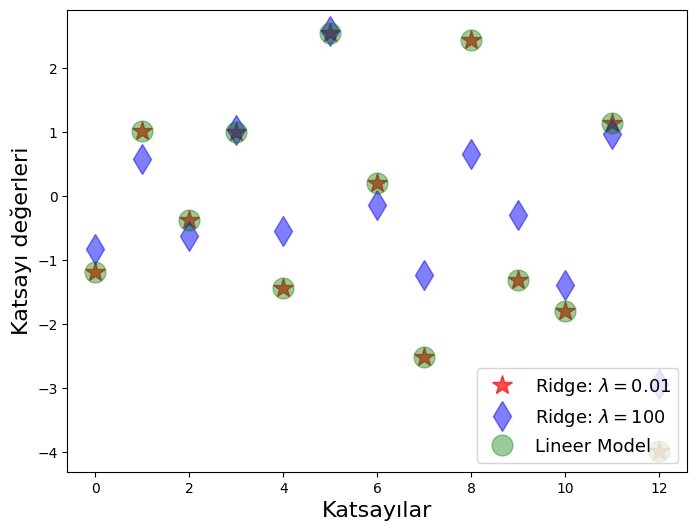

In [17]:
# Grafikler
plt.figure(figsize=(8,6))
plt.plot(ridge.coef_.ravel(), 
         alpha =0.7,
         linestyle = 'none',
         marker = '*',
         markersize = 15,
         color = 'red',
         label = r'Ridge: $\lambda = 0.01$')
plt.plot(ridge2.coef_.ravel(),
         alpha = 0.5,
         linestyle = 'none',
         marker = 'd',
         markersize = 15,
         color = 'blue',
         label = r'Ridge: $\lambda = 100$')
plt.plot(lineerModel.coef_.ravel(),
         alpha = 0.4,
         linestyle = 'none',
         marker = 'o',
         markersize = 15,
         color = 'green',
         label = 'Lineer Model')

plt.xlabel('Katsayılar', fontsize = 16)
plt.ylabel('Katsayı değerleri', fontsize = 16)
plt.legend(fontsize = 13, loc = 4)
plt.show()

Lasso: Egitim verisi R^2 değeri 0.7418464117741546
Lasso: Test verisi R^2 değeri 0.713810870621956
Lasso2: Egitim verisi R^2 değeri 0.67408651550395
Lasso2: Test verisi R^2 değeri 0.6615821942683833
Lasso3: Egitim verisi R^2 değeri 0.0
Lasso3: Test verisi R^2 değeri -0.0013140651016114724


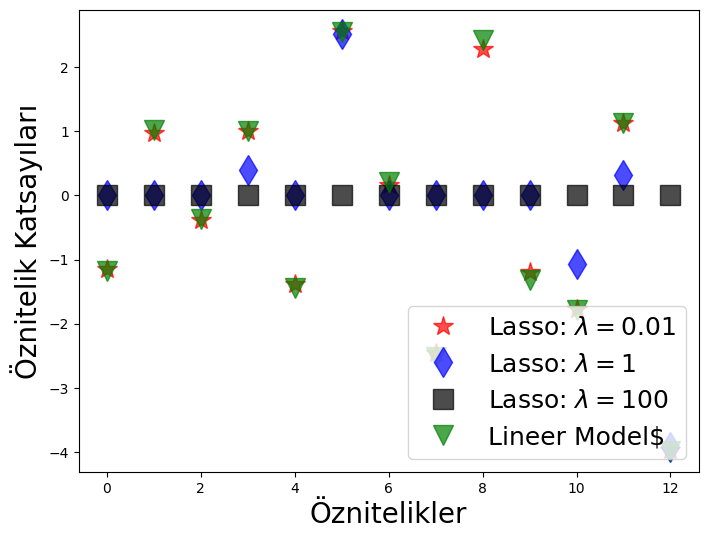

In [18]:
# Lasso 
lasso = Lasso(alpha = 0.01) # Lasso model objesinin yaratılması, lambda = 0.01 
lasso.fit(X_egitim, y_egitim)
lasso_egitim_r2 = lasso.score(X_egitim, y_egitim)
lasso_test_r2 = lasso.score(X_test, y_test)
print('Lasso: Egitim verisi R^2 değeri', lasso_egitim_r2)
print('Lasso: Test verisi R^2 değeri', lasso_test_r2)

lasso2 = Lasso(alpha = 1)
lasso2.fit(X_egitim, y_egitim)
lasso2_egitim_r2 = lasso2.score(X_egitim, y_egitim)
lasso2_test_r2 = lasso2.score(X_test, y_test)
print('Lasso2: Egitim verisi R^2 değeri', lasso2_egitim_r2)
print('Lasso2: Test verisi R^2 değeri', lasso2_test_r2)

lasso3 = Lasso(alpha = 100)
lasso3.fit(X_egitim, y_egitim)
lasso3_egitim_r2 = lasso3.score(X_egitim, y_egitim)
lasso3_test_r2 = lasso3.score(X_test, y_test)
print('Lasso3: Egitim verisi R^2 değeri', lasso3_egitim_r2)
print('Lasso3: Test verisi R^2 değeri', lasso3_test_r2)

# Grafikler
plt.figure(figsize=(8,6))
plt.plot(lasso.coef_,
         alpha = 0.7,
         linestyle = 'none',
         marker = '*',
         markersize = 15,
         color = 'red',
         label = r'Lasso: $\lambda = 0.01$')
plt.plot(lasso2.coef_,
         alpha = 0.7,
         linestyle = 'none',
         marker = 'd',
         markersize = 15,
         color = 'blue',
         label = r'Lasso: $\lambda = 1$')
plt.plot(lasso3.coef_,
         alpha = 0.7,
         linestyle = 'none',
         marker = 's',
         markersize = 15,
         color = 'black',
         label = r'Lasso: $\lambda = 100$')
plt.plot(lineerModel.coef_.ravel(),
         alpha = 0.7,
         linestyle = 'none',
         marker = 'v',
         markersize = 15,
         color = 'green',
         label = r'Lineer Model$')
plt.xlabel('Öznitelikler', fontsize = 20)
plt.ylabel('Öznitelik Katsayıları', fontsize = 20)
plt.legend(fontsize = 18, loc = 4)
plt.show()


In [19]:
# Öznitelik Katsayı incelemesi
lasso_katsayilar = sum(lasso.coef_ == 0)
lasso2_katsayilar = sum(lasso2.coef_ == 0)
lasso3_katsayilar = sum(lasso3.coef_ == 0)

print('Lasso (lambda = 0.01): ', lasso_katsayilar)
print('Lasso (lambda = 1): ', lasso2_katsayilar)
print('Lasso (lambda = 100): ', lasso3_katsayilar)

# Lasso2 modelinde beta katsayısı 0 olan özniteliklerin bulunması
print(X.columns[np.where(lasso2.coef_ == 0)[0]])

Lasso (lambda = 0.01):  0
Lasso (lambda = 1):  8
Lasso (lambda = 100):  13
Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX'], dtype='object')


Lineer: Egitim verisi R2 degeri  0.7419034960343789
Lineer: Test verisi R2 degeri 0.7147895265576846
Lasso: Egitim verisi R^2 değeri 0.7367677037371507
Lasso: Test verisi R^2 değeri 0.6994672113249885
Ridge: Egitim verisi R2 degeri 0.7419033420338517
Ridge: Test verisi R2 degeri 0.714716616307928
ElasticNet: Egitim verisi R^2 değeri 0.7418033757071111
ElasticNet: Test verisi R^2 değeri 0.713082124340557


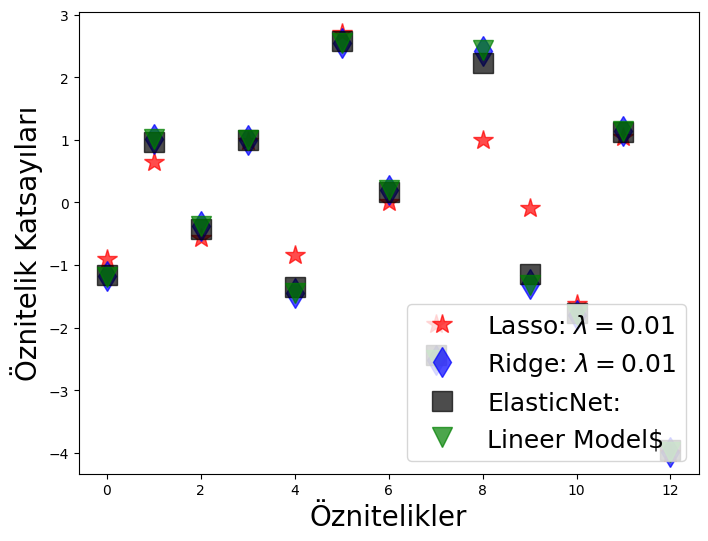

In [20]:
# Lineer Model
lineerModel = LinearRegression() # model objesinin yaratılması
lineerModel.fit(X_egitim, y_egitim) # modelin eğitim verisi kullanılarak uydurulması
lineer_egitim_r2 = lineerModel.score(X_egitim, y_egitim) # modelin eğitim verisi üzerinde R^2 değeri
lineer_test_r2 = lineerModel.score(X_test, y_test) # modelin test verisi üzerinde R^2 değeri
print('Lineer: Egitim verisi R2 degeri ', lineer_egitim_r2)
print('Lineer: Test verisi R2 degeri', lineer_test_r2)

# Lasso
lasso = Lasso(alpha = 0.1) # Lasso model objesinin yaratılması, lambda = 0.01 
lasso.fit(X_egitim, y_egitim)
lasso_egitim_r2 = lasso.score(X_egitim, y_egitim)
lasso_test_r2 = lasso.score(X_test, y_test)
print('Lasso: Egitim verisi R^2 değeri', lasso_egitim_r2)
print('Lasso: Test verisi R^2 değeri', lasso_test_r2)

# Ridge
ridge = Ridge(alpha = 0.1) # Ridge model objesinin yaratılması, lambda = 0.01 
ridge.fit(X_egitim, y_egitim) # modelin eğitim verisi kullanılarak uydurulması
ridge_egitim_r2 = ridge.score(X_egitim, y_egitim)
ridge_test_r2 = ridge.score(X_test, y_test)
print('Ridge: Egitim verisi R2 degeri', ridge_egitim_r2)
print('Ridge: Test verisi R2 degeri', ridge_test_r2)

# ElasticNet 
elastic = ElasticNet(alpha = 0.01, l1_ratio=0.5)
elastic.fit(X_egitim, y_egitim)
elastic_egitim_r2 = elastic.score(X_egitim, y_egitim)
elastic_test_r2 = elastic.score(X_test, y_test)
print('ElasticNet: Egitim verisi R^2 değeri', elastic_egitim_r2)
print('ElasticNet: Test verisi R^2 değeri', elastic_test_r2)


# Grafikler
plt.figure(figsize=(8,6))
plt.plot(lasso.coef_.ravel(),
         alpha = 0.7,
         linestyle = 'none',
         marker = '*',
         markersize = 15,
         color = 'red',
         label = r'Lasso: $\lambda = 0.01$')
plt.plot(ridge.coef_.ravel(),
         alpha = 0.7,
         linestyle = 'none',
         marker = 'd',
         markersize = 15,
         color = 'blue',
         label = r'Ridge: $\lambda = 0.01$')
plt.plot(elastic.coef_.ravel(),
         alpha = 0.7,
         linestyle = 'none',
         marker = 's',
         markersize = 15,
         color = 'black',
         label = r'ElasticNet:')
plt.plot(lineerModel.coef_.ravel(),
         alpha = 0.7,
         linestyle = 'none',
         marker = 'v',
         markersize = 15,
         color = 'green',
         label = r'Lineer Model$')
plt.xlabel('Öznitelikler', fontsize = 20)
plt.ylabel('Öznitelik Katsayıları', fontsize = 20)
plt.legend(fontsize = 18, loc = 4)
plt.show()

In [42]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=150,n_features=100,n_informative=3, noise=4, random_state=0)
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y,
                                                      test_size = 0.3,
                                                      random_state = 3)

Lineer: Egitim verisi R2 degeri  0.9997859218763976
Lineer: Test verisi R2 degeri 0.9098451622548822
Lasso: Egitim verisi R^2 değeri 0.9994255537455046
Lasso: Test verisi R^2 değeri 0.9979388440613525
Ridge: Egitim verisi R2 degeri 0.9997214610394455
Ridge: Test verisi R2 degeri 0.9826284092892076
ElasticNet: Egitim verisi R^2 değeri 0.9994255537455046
ElasticNet: Test verisi R^2 değeri 0.9979388440613525


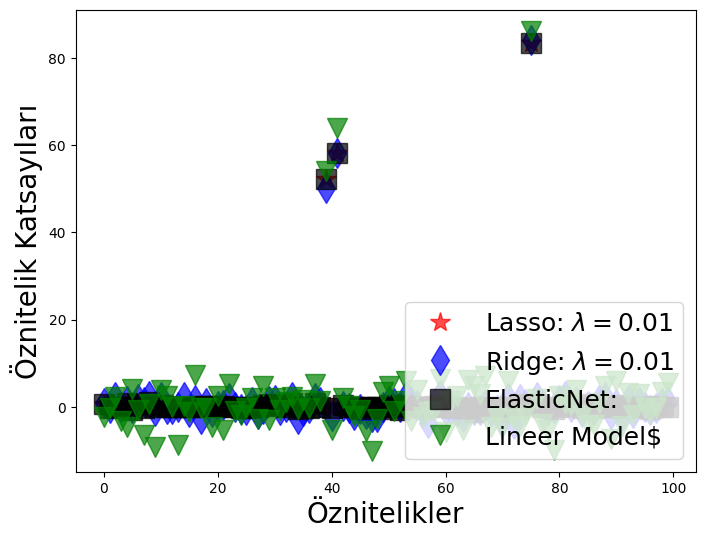

In [43]:
# Lineer Model
lineerModel = LinearRegression() # model objesinin yaratılması
lineerModel.fit(X_egitim, y_egitim) # modelin eğitim verisi kullanılarak uydurulması
lineer_egitim_r2 = lineerModel.score(X_egitim, y_egitim) # modelin eğitim verisi üzerinde R^2 değeri
lineer_test_r2 = lineerModel.score(X_test, y_test) # modelin test verisi üzerinde R^2 değeri
print('Lineer: Egitim verisi R2 degeri ', lineer_egitim_r2)
print('Lineer: Test verisi R2 degeri', lineer_test_r2)

# Lasso
lasso = Lasso(alpha = 0.1) # Lasso model objesinin yaratılması, lambda = 0.01 
lasso.fit(X_egitim, y_egitim)
lasso_egitim_r2 = lasso.score(X_egitim, y_egitim)
lasso_test_r2 = lasso.score(X_test, y_test)
print('Lasso: Egitim verisi R^2 değeri', lasso_egitim_r2)
print('Lasso: Test verisi R^2 değeri', lasso_test_r2)

# Ridge
ridge = Ridge(alpha = 0.1) # Ridge model objesinin yaratılması, lambda = 0.01 
ridge.fit(X_egitim, y_egitim) # modelin eğitim verisi kullanılarak uydurulması
ridge_egitim_r2 = ridge.score(X_egitim, y_egitim)
ridge_test_r2 = ridge.score(X_test, y_test)
print('Ridge: Egitim verisi R2 degeri', ridge_egitim_r2)
print('Ridge: Test verisi R2 degeri', ridge_test_r2)

# ElasticNet 
elastic = ElasticNet(alpha = 0.1, l1_ratio=1)
elastic.fit(X_egitim, y_egitim)
elastic_egitim_r2 = elastic.score(X_egitim, y_egitim)
elastic_test_r2 = elastic.score(X_test, y_test)
print('ElasticNet: Egitim verisi R^2 değeri', elastic_egitim_r2)
print('ElasticNet: Test verisi R^2 değeri', elastic_test_r2)



# Grafikler
plt.figure(figsize=(8,6))
plt.plot(lasso.coef_.ravel(),
         alpha = 0.7,
         linestyle = 'none',
         marker = '*',
         markersize = 15,
         color = 'red',
         label = r'Lasso: $\lambda = 0.01$')
plt.plot(ridge.coef_.ravel(),
         alpha = 0.7,
         linestyle = 'none',
         marker = 'd',
         markersize = 15,
         color = 'blue',
         label = r'Ridge: $\lambda = 0.01$')
plt.plot(elastic.coef_.ravel(),
         alpha = 0.7,
         linestyle = 'none',
         marker = 's',
         markersize = 15,
         color = 'black',
         label = r'ElasticNet:')
plt.plot(lineerModel.coef_.ravel(),
         alpha = 0.7,
         linestyle = 'none',
         marker = 'v',
         markersize = 15,
         color = 'green',
         label = r'Lineer Model$')
plt.xlabel('Öznitelikler', fontsize = 20)
plt.ylabel('Öznitelik Katsayıları', fontsize = 20)
plt.legend(fontsize = 18, loc = 4)
plt.show()

In [44]:
lineerModel.coef_

array([-2.27608227e+00, -2.79178105e-01,  2.29611965e+00, -3.29702181e+00,
       -4.70322612e+00,  4.18130915e+00, -8.12468108e-01, -6.38729807e+00,
        7.39355117e-01, -9.32922336e+00,  3.93710915e+00,  2.50549114e+00,
       -1.57763723e-01, -8.76829855e+00,  2.58102119e-01, -1.18194692e+00,
        7.36029862e+00, -2.37726103e-01, -1.59882121e-01, -4.65490341e+00,
        2.39381176e+00, -5.28004628e+00,  5.32650990e+00, -9.75764619e-01,
       -1.95338576e+00, -3.55099092e-01,  1.95161345e+00, -2.78954526e+00,
        4.70824321e+00, -3.04787079e+00,  2.03340188e+00, -6.45984889e-01,
        1.07536071e+00,  2.34410358e+00, -4.11596482e-01,  1.51972220e+00,
       -1.84592320e-01,  5.34420163e+00,  1.43785000e+00,  5.40709899e+01,
       -5.23171427e+00,  6.39473603e+01,  2.10574607e+00,  7.14969653e-02,
       -2.19973503e+00, -6.97659959e-01, -5.54701797e+00, -1.00712855e+01,
       -2.79857484e+00,  3.47646387e+00,  4.66381300e+00, -8.88553942e-01,
        1.26908211e+00,  

In [45]:
lasso.coef_

array([ 5.71689113e-01, -3.07071988e-01, -0.00000000e+00,  0.00000000e+00,
        9.62019580e-01, -7.31302314e-01,  6.21500885e-01, -2.84043490e-01,
        1.08981738e+00,  0.00000000e+00,  4.73404685e-01, -2.64201320e-02,
       -0.00000000e+00,  0.00000000e+00,  8.52927029e-03, -0.00000000e+00,
        0.00000000e+00,  2.90346057e-01,  1.18058844e-01, -0.00000000e+00,
        9.08790737e-02,  7.39501904e-02, -0.00000000e+00,  0.00000000e+00,
       -2.53073496e-01, -3.15534177e-01,  5.16014337e-02, -0.00000000e+00,
        4.09656778e-01,  7.17152003e-01,  2.92284483e-01,  3.83066093e-01,
        0.00000000e+00,  8.09332204e-01, -5.77949177e-01, -3.53695086e-01,
       -1.94481013e-01,  9.46650604e-01, -0.00000000e+00,  5.22246000e+01,
       -2.30817077e-01,  5.81047156e+01,  3.71070430e-01, -8.22388213e-02,
        0.00000000e+00, -4.36125856e-01, -0.00000000e+00, -0.00000000e+00,
       -3.55445267e-02, -4.49412466e-01,  3.41077761e-01, -0.00000000e+00,
       -6.21661275e-01,  

### Model Save and Load
- https://onnx.ai/
- https://github.com/onnx/onnxmltools
- https://onnx.ai/sklearn-onnx/
- https://scikit-learn.org/stable/model_persistence.html
- https://neptune.ai/blog/saving-trained-model-in-python

In [46]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
X, y = iris.data, iris.target
X = X.astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y)
clr = RandomForestClassifier()
clr.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
X[:1]

array([[5.1, 3.5, 1.4, 0.2]], dtype=float32)

#### Referans:
Kodlar ve daha fazla teorik bilgi icin [IMO2020](https://github.com/sibirbil/IMO2020/tree/master) ziyaret edebilirsiniz.